# Sammenligning av teoretiske beregninger og praktiske målinger via rulling på bane

#### *M. K. Booth, L. Engø-Monsen, S. L. Kildahl, K. Skrede* ####

## Sammendrag ##

En måte å se på sammenhengen mellom teoretiske modeller og virkeligheten er ved å måle utføre et eksperiment i virkeligheten og så simulere det numerisk ved hjelp av teknologi. Ved hjelp av høyhastighetsfilming ble en kule rullende ned en bane målt til å ha gjennomsnittshastighet $ (1.1496 \pm 0.0115)m/s $ og en gjennomsnittlig kinetisk energi $ (0.287 \pm 9.65*10^{-8}) J. $ Det var et et avvik fra den teoretiske modellen simulert og den numeriske modellen, det kan skyldes perspektivfeil eller feil ved den teoretiske modellen som neglesjering av friksjon. 



## Introduksjon ##

Moderne fysikk bygger på hypoteser som gjennom mange forsøk har blitt testet og utfordret før de har gått inn som teorier i dag. Disse teoriene har metoder for utregninger som gir analytiske svar som en modell på virkeligheten. I tillegg eksisterer det måter å tilnærme en løsning ved hjelp av numeriske metoder som gjetter seg til flere løsninger for definere en gjennomsnittlig løsning. I denne rapporten sammenligner vi derfor et analytisk med et numerisk svar for å vurdere om den analytiske metoden er en god nok modell av virkeligheten vi setter fra den numeriske løsningen av en kule som ruller ned en bane.


## Teori ##

 en berg-og-dal-bane vil hastigheten og akselerasjonen variere på grunn av krumt underlag. Dersom baneformen y(x) er kjent, samt dens første- og andrederiverte, kan diverse størrelser til et kuleformet legeme som ruller langs banen bestemmes. Her er y høyden på banen (også kulens vertikale posisjon) som en funksjon av kulens horisontale posisjon x. Kulen har et treghetsmoment
    $$ I = c*m*R^2 ,$$
der R er kulens radius, m er dens masse og vi antar uniform massefordeling slik at $c = ⅖$. 

Det antas at kulen ruller uten å gli, slik at total kinetisk energi K, er lik summen av translasjonsenergien $ E_t $ og rotasjonsenergien $ E_r $, slik at
   $$ E_t = {m*v^2\over 2} $$
   $$ E_r = {c*m*v^2\over 2} $$
   $$ K = E_t + E_r = {(1+c)*m*v^2\over 2} $$

der v er kulens hastighet.
Når kulen starter med $v = 0 $ i høyde  $h = y(0) = y0$ får vi total mekanisk energi $E = U + K = U$, der $U = m*g*y0$. Ettersom vi kjenner til baneformen $y(x)$ kan vi bruke energibevaring for å finne farten $v$ som et uttrykk av $x:$

$$ v(x) = \sqrt{2g(y_0 - y(x)) \over (1+c)} $$



Her antar vi at både friksjon og luftmotstand er neglisjerbart over de relevante tids- og hastighetsintervallene. Alle målinger av fysiske størrelser er usikre som vi anslår på grunnlag av f.eks presisjonen på et måleinstrument, menneskelige feil eller ved å regne ut standardfeil til en måleserie. 


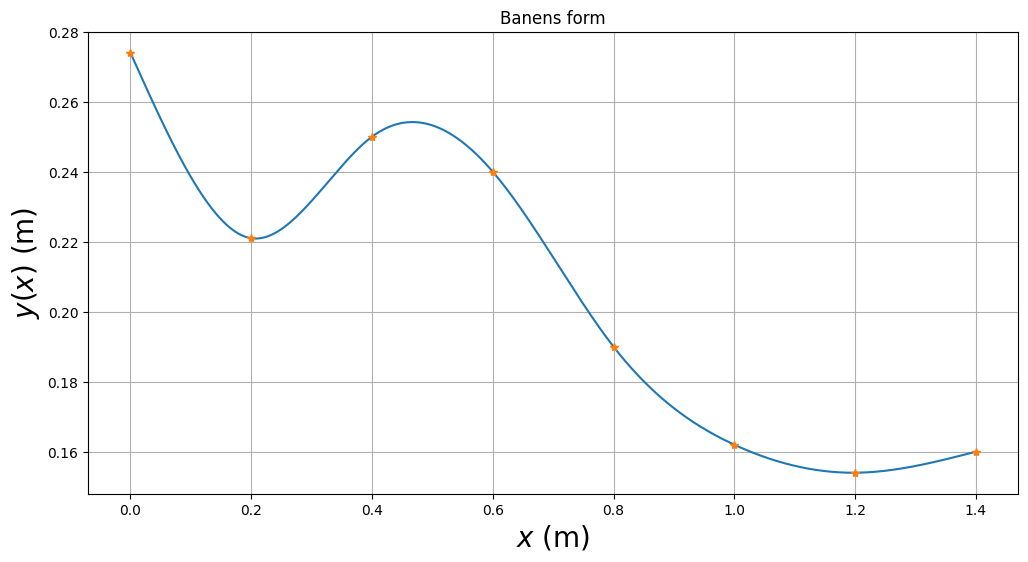

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

h = 0.200
xfast = np.asarray([0, h, 2*h, 3*h, 4*h, 5*h, 6*h, 7*h])

xmin = 0.000
xmax = 1.401
dx = 0.001

yfast = np.asarray([0.274, 0.221, 0.25, 0.24, 0.19, 0.162, 0.154, 0.16])
inttan = np.diff(yfast)/h

cs = CubicSpline(xfast, yfast, bc_type='natural')
xmin = 0.000
xmax = 1.401
dx = 0.001

x = np.arange(xmin, xmax, dx)

Nx = len(x)
y = cs(x)  # y=tabell med 1401 verdier for y(x)
dy = cs(x, 1)  # dy=tabell med 1401 verdier for y'(x)
d2y = cs(x, 2)  # d2y=tabell med 1401 verdier for y''(x)

baneform = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, y, xfast, yfast, '*')
plt.title('Banens form')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$y(x)$ (m)', fontsize=20)
plt.grid()
plt.show()

*Figur 1*



## Resultater ##
Graf for hasitghet, kinetisk energi og bane
Banestart og -slutt ble målt hhv høydene $ (27.5 ± 0.5) cm$ og $ (17.5 ± 0.5) cm $ (se Figur 1), der usikkerheten er anslag basert på avlesningsnøyaktigheten.


| Y verdi med usikkerhet |
|----------------|
|0.27  ± 0.5cm   |
|0.221 ± 0.5cm   |
|0.25 ± 0.5cm    |
|0.24 ± 0.5cm    |
|0.19 ± 0.5cm    |
|0.162 ± 0.5cm   |
|0.154 ± 0.5cm   |           
|0.16 ± 0.5cm    |

*Tabell 1*


Det ble tatt 10 målinger av kulens slutthastighet i banen. Gjennomsnittet av og standardfeilen i disse verdiene gir en gjennomsnittlig slutthastighet på $ (1.1496 \pm 0.0115) m/s $ som gir gjennomsnittlig kinetisk energi $(0.287 \pm 9.65*10^{-8}) J. $  hvor usikkerheten er beregnet ved differansen mellom høyeste og laveste målte hastighet. 

Et tilfeldig valgt datasett (måling #6) er vist i *figur* 2 sammen med den numeriske løsningen av farten til kulen nedover banen. Det var noen ulikheter fra farten i den analytiske modellen og numerikken, noe som er forventet. Samme datasett og farten vi får fra det gir oss også *figur 3* som viser den analytiske og den numeriske kinetiske energien. Ettersom den er avhengig av farten ser vi en lik grad av ulikhet mellom disse grafene som med farten.

In [23]:
#Her leser vi inn målt data

g = 9.81
# treghetsmomentet
c = 2/5
M = 0.031
R = 0.011
I = c*M*R**2

file = 'lab_data.txt'
f = open(file, 'r')
data_list = f.readlines()
time_data, x_data, y_data, v_data, ek_data = [],[],[],[],[]

for i in range(2,len(data_list)):
    data_list[i] = data_list[i].replace(',','.')
    data = data_list[i].strip('\n').split('\t')
    time_data.append(float(data[0]))
    x_data.append(float(data[1]))
    y_data.append(float(data[2]))
    v_data.append(float(data[3]))
    omega = float(data[3])/R
    e_kinetic = (1/2)*M*(float(data[3])**2)
    e_rotation = (1/2)*I*(omega**2)
    ek_data.append(e_kinetic+e_rotation)

In [24]:
# fart
def v():
    return np.sqrt((2*g*(y[0]-y)/(1+c)))

$$ v = \sqrt{2g(y_0 - y) \over (1+c)} $$

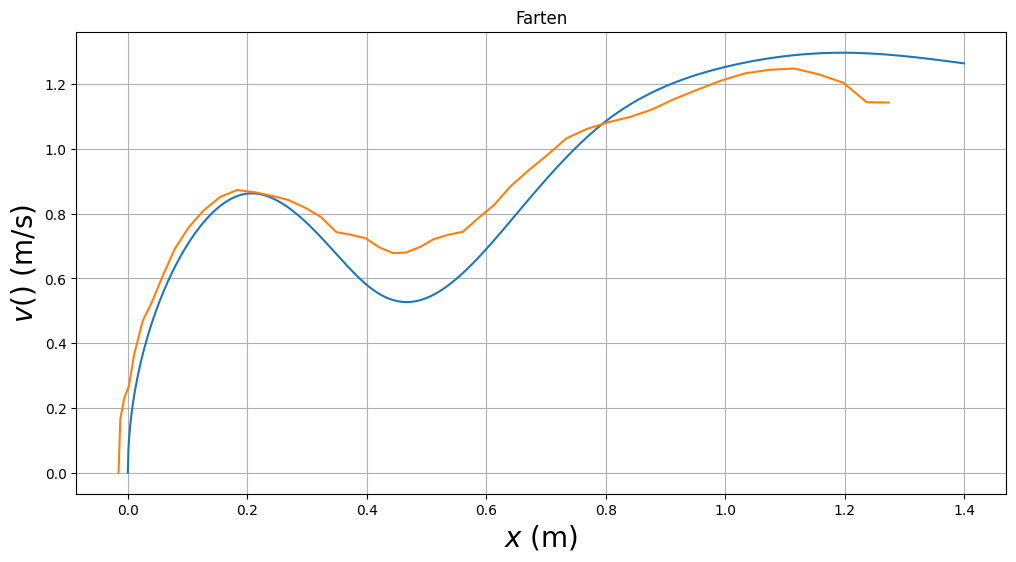

In [25]:
fart = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, v())
plt.plot(x_data,v_data)
plt.title('Farten')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v()$ (m/s)', fontsize=20)
plt.grid()
plt.show()

*Figur 2*

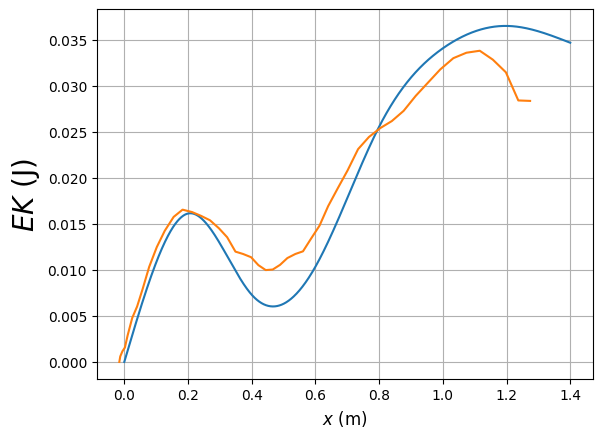

In [26]:
def kinetic_energy():
    return 1/2 * M * v()**2 + 1/2 * I * (v()/R)**2

plt.plot(x, kinetic_energy())
plt.plot(x_data, ek_data)
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$EK$ (J)', fontsize=20)
plt.grid()
plt.show()

*Figur 3*

## Diskusjon ##
Vi baserer målingen av farten til kulen på banen på å måle x- og y-posisjon. Disse avstandene er målt med en sikkerhet som er begrenset av nøyaktighet i menneskelig avlesning av meterstaven. Denne feilen har vi antatt at vil ligge ved størrelsesorden av $ \pm 0.05cm. $ 
Det er andre feilkilder som kan ha spilt inn. Dette er spesielt perspektivfeil. Et eksempel på dette var avstanden mellom banen og kameraet som ble målt til 1.2 m. Dette kan gi perspektivfeil dersom dybden/avstanden var målt feil. For eksempel, dersom avstanden hadde vært 1.25m ville vi fått perspektivfeil på $ (1.0m/1.2m) * 1.25m -1.0m ≈ 4cm $ i posisjonsmålingene til Tracker. Dette kan forklare avviket vi får på målingene av farten. 

Til slutt er det noen mulige feilkilder knyttet til forenklinger i den teoretiske modellen som beskriver systemet og eksperimentet vårt. Blant annet neglisjerer vi luftmotstand, friksjon og en ikke rett/direkte bane for kulen. Det er rimelig å anta at ballen ruller uten å gli da kulen er laget av et materiale som er glatt og har en relativt liten radius. I realiteten av eksperimentet vil faktorene som friksjon og luftmotstand spille inn. Vi observerte blant annet at ballen ikke alltid rullet rett ned på banen, men kunne dunke mot “veggene” i sporet. Dette førte i så fall til mer friksjon (som vi ser bort fra i den teoretiske modellen), overføring av energi i dunkene og derfor en lavere fart på avlesningen. 

## Konklusjon ##
Vi målte fart og kinetisk energi av en kule som rullet ned en bane både med numerisk og analytisk løsning. Resultatet viste noe ulike verdier for de to mulige løsningene. Grunner til disse avvikene kan skyldes menneskelige avlesningsfeil, perspektivfeil og neglisjering av luftmotstand, friksjon og andre usikkerheter i en rullende kule.

## Referanser ##
Støvneng, J. A. (2021, Januar 31). *Ren rulling på krumt underlag – energibevarelse.* Hentet fra TFY41xx Fysikk: Labprosjekt Vår 2021: https://home.phys.ntnu.no/brukdef/undervisning/fyslab/files/labligninger.pdf


In [27]:
# hellningsvinkel
def betha():
    return np.arctan(dy)

$$ \beta = \arctan{y'} $$

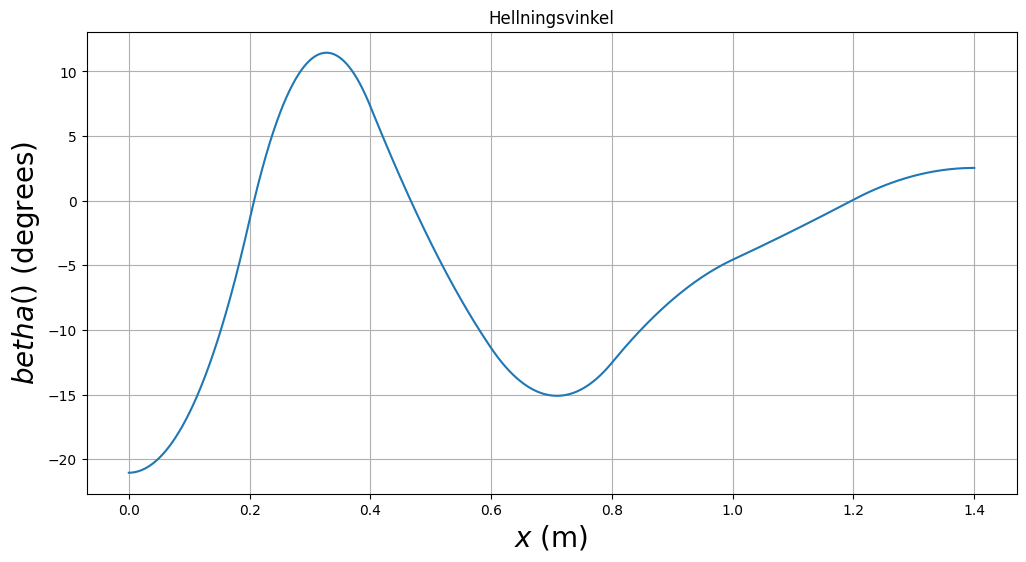

In [28]:
beta = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, betha()*180/np.pi)
plt.title('Hellningsvinkel')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$betha()$ (degrees)', fontsize=20)
plt.grid()
plt.show()

* Legg inn etter rapport *

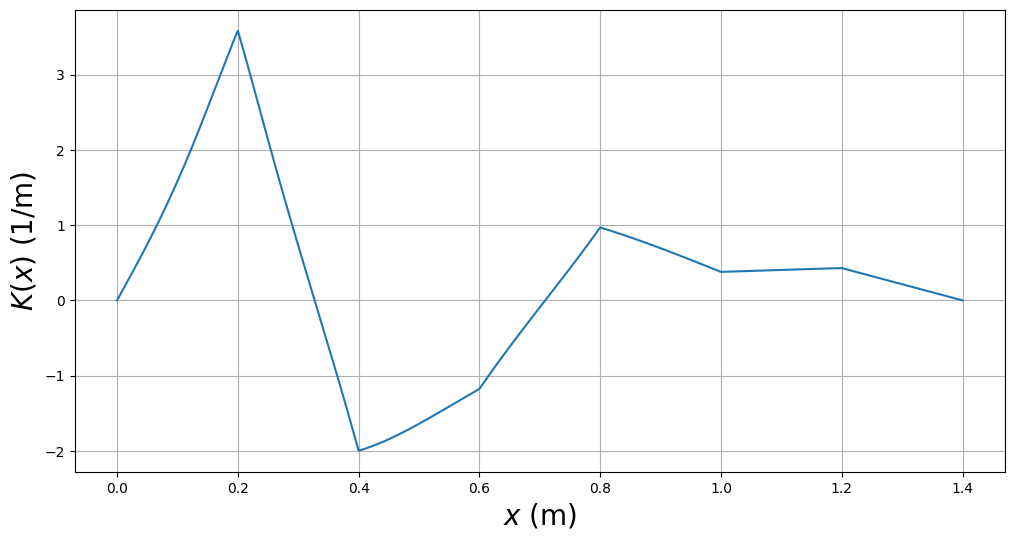

In [29]:
# sentripetalakselerasjon
def a():
    return v()**2 * k()

def k():
    return d2y/(1+dy*dy)**(3/2)

# normalkraft
def N():
    return M*(g*np.cos(betha())+a())

K = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, k())
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$K(x)$ (1/m)', fontsize=20)
plt.grid()
plt.show()

$$ a = v^2 * k $$


$$ κ = {y′′ \over (1+y′^2)^{3/2}} $$

$$ N = M(g cos β + a⊥) $$

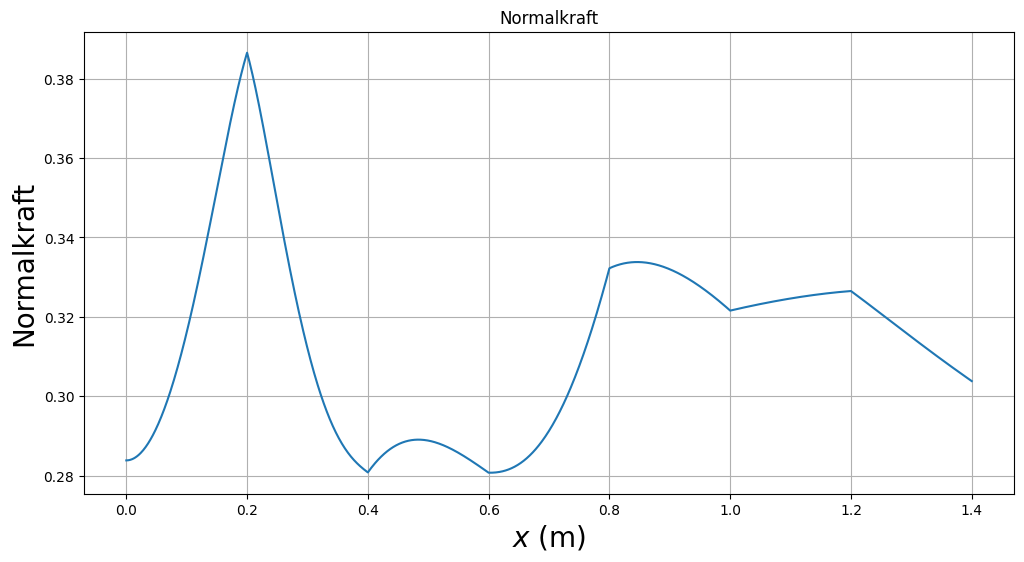

In [30]:
normalkraft = plt.figure('y(x)', figsize=(12, 6))
plt.plot(x, N())
plt.title('Normalkraft')
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('Normalkraft', fontsize=20)
plt.grid()
plt.show()

In [31]:
# friksjon
def friksjon():
    return (c*M*g*np.sin(betha()))/(1+c)

$$ f = {cMg sin β \over {1 + c}} $$ 

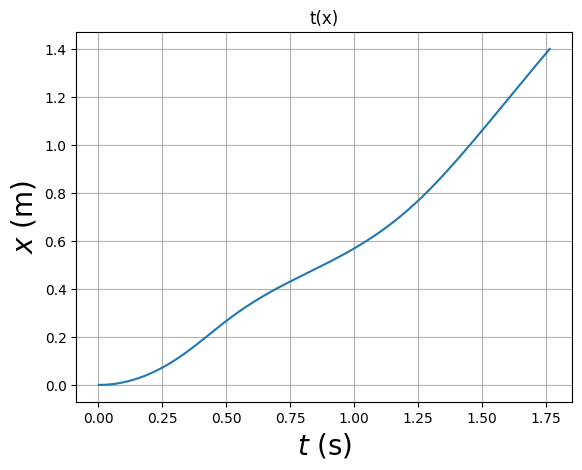

In [32]:
def v_xn():
    return v()*np.cos(betha())

def average_v_xn(n):
    return 1/2 * (v_xn()[n]+v_xn()[n-1])

def delta_tn(n):
    return dx/average_v_xn(n)

def t():
    sum = 0
    result = []
    for i in range(Nx):
        sum += delta_tn(i)
        result.append(sum)
    return result

plt.plot(t(), x)
plt.title('t(x)')
plt.ylabel('$x$ (m)', fontsize=20)
plt.xlabel('$t$ (s)', fontsize=20)
plt.grid()
plt.show()

$$ ⟨v_x⟩_n = {1 \over 2} * (v_x,_{n -1} + v_x,_n) $$

$$ ∆t_n = {∆x_n \over ⟨v_x⟩_n} = {2∆x_n \over(v_x,_{n-1} + v_x,_n)} $$

$$ ∆t_n = \displaystyle\sum_{j=1}^{n} ∆t_j $$

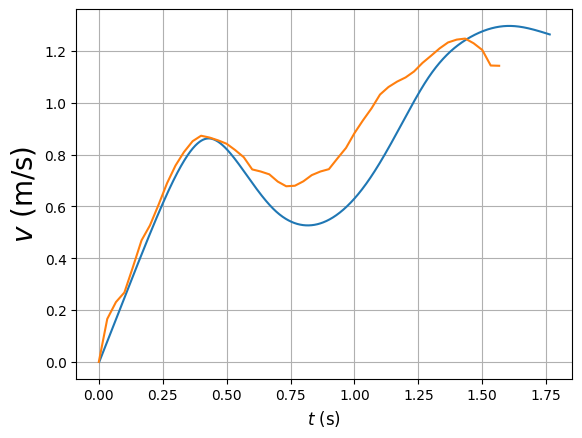

In [33]:
# Hastighet som funksjon av tiden
plt.plot(t(), v())
plt.plot(time_data,v_data)
plt.xlabel('$t$ (s)', fontsize=12)
plt.ylabel('$v$ (m/s)', fontsize=20)
plt.grid()
plt.show()

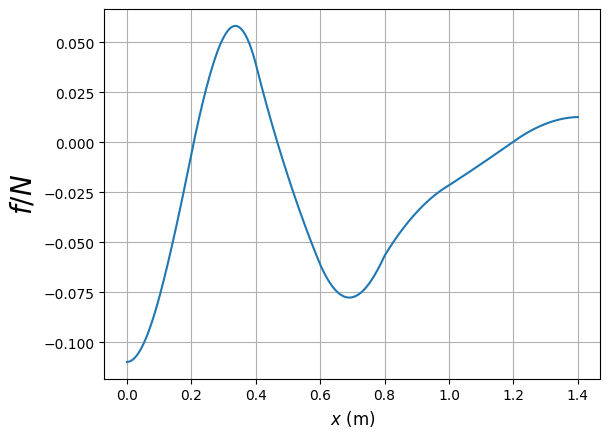

In [34]:
# Forholdet mellom friksjonskraften f og normalkraften N
plt.plot(x, friksjon()/N())
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$f/N$', fontsize=20)
plt.grid()
plt.show()

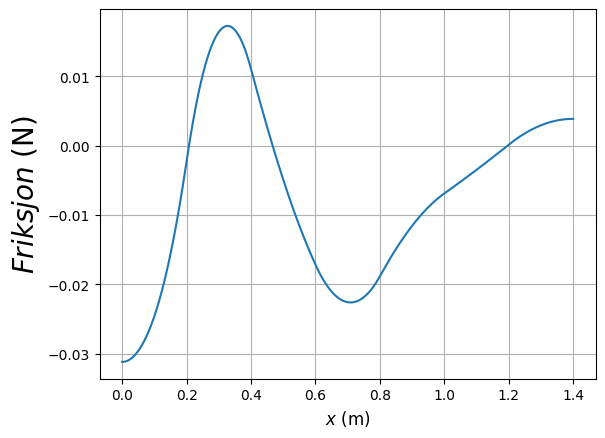

In [35]:
# Friksjonskraft graf
plt.plot(x, friksjon())
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$Friksjon$ (N)', fontsize=20)
plt.grid()

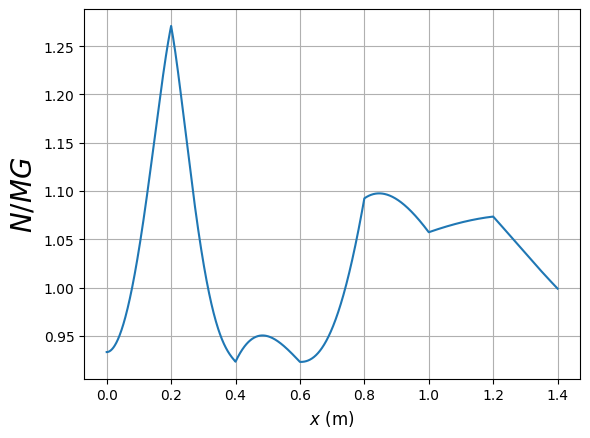

In [36]:
# N/Mg, normalkraft i forhold til G
plt.plot(x, N()/(M*g))
plt.xlabel('$x$ (m)', fontsize=12)
plt.ylabel('$N/MG$', fontsize=20)
plt.grid()
plt.show()

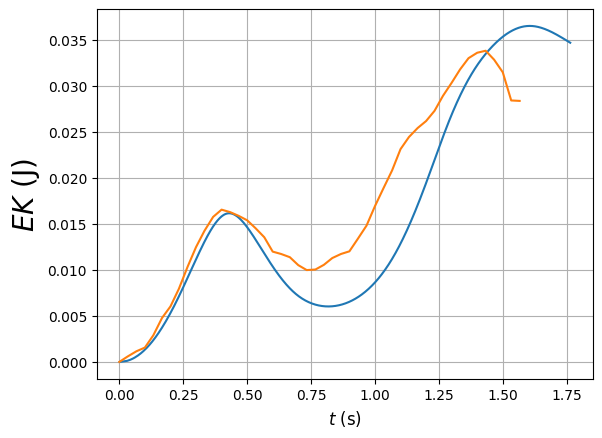

In [37]:
def kinetic_energy():
    return 1/2 * M * v()**2 + 1/2 * I * (v()/R)**2

plt.plot(t(), kinetic_energy())
plt.plot(time_data, ek_data)
plt.xlabel('$t$ (s)', fontsize=12)
plt.ylabel('$EK$ (J)', fontsize=20)
plt.grid()
plt.show()

